# Análisis exploratorio de datos
Basado en Hair et AI. (2013), capítulo 'Examining your data', vamos a proceder con los siguientes pasos

* **1. Entender el problema:** Mirar cada variable y su relevancia para resolver el problema
* **2. Análisis univariante:** realizado sobre la variable target (SalesPrice)
* **3. Análisis multiunivariante:** para obtener variables dependientes e independientes
* **4. Limpieza de datos:** detectar NAs, outliers y variables categóricas
* **5. Transformación de datos:** aplicando análisis multivariante, vamos a tener que 
    - Normalizar datos: hacer que sigan una distribución normal (dado que luego cuando usemos algunos análisis estadísticos, si no lo siguen nos saldrán mal). Lo haremos solo respecto a la variable target y si tenemos pocos datos, dado que este punto para grandes volumenes de datos no suele ser un problema
    - Heterocedasticidad: para asegurar que un error no es constante para todas las variables independientes
    - Linealidad
    - Asegurar que no hay errores correlacionados

* **6. Conclusiones** 

---

En este apartado, el del análisis de los datos, abordaremos los puntos 1 a 3, y en el siguiente, el de la preparación, del 4 al 6


## 1. Entender el problema

Realizamos Importación de librerías y ficheros 

In [1]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importación de ficheros
df_train = pd.read_csv('data/PreciosCasas/train.csv')
df_train.describe();
df_train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [2]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Como se puede observar, hemos importado 1460 registros distintos, y disponemos de varias variables para determinar el precio de las casas
Tenemos de variables numéricas y categóricas, además, para empezar el análisis vamos a:
* seleccionar aquellas que por lógica, nos parece que guardarán más relación con la variable target (SalesPrice). Por ejemplo, si el tener o no garaje puede encarecer un piso (que parece indicar que si), o
* y que variables a priori, parecen relacionadas entre sí. Por ejemplo, hasta que punto necesito LandScope, que me indica ya la inclinación de la propiedad, si tengo ya LandContour

A priori, suponemos que las siguientes variables son importantes: OverallQual, YearBuilt, TotalBsmtSF, GrLivArea, Neigborhood

y analicemos entonces la **variable target**. Se ve el los resultados anteriores ( o por ``df_train['SalePrice'].describe()`` ) que sí tenemos datos para las 1460 variables, que el mínimo es mayor que cero (y por lo tanto, sí hay información) y que además se distribuye siguiendo una distribución normal con asimetría positiva (possitive skewness), es decir, son sesgo en valores superiores a la media (tenemos propiedades cuyo precio es muy superior al de la mayoría), y con los valores concentrados en la región central de la distribución (curtosis > D. normal). 
**Podemos por tanto continuar el análisis para predicción de esa variable **

Skewness: 1.882876
Kurtosis: 6.536282


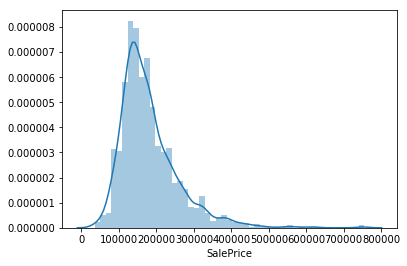

In [3]:
#histograma
sns.distplot(df_train['SalePrice']);

# Valor de la asimetría y curtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

## 2. Análisis univariante 
¿Qué relación hay entre el target y el resto de variables?

Hemos dicho que íbamos a seleccionar ciertas variables, veamos como se relacionan con la target

***Variables numéricas***


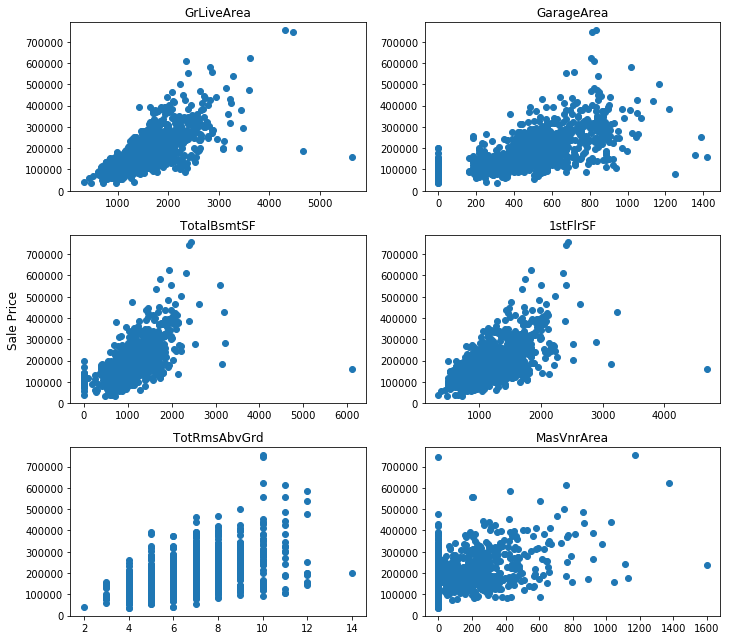

In [9]:
# 1) scatter plot entre grlivarea/saleprice con totalbsmtsf con (varias)

plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = df_train.SalePrice.values
axarr[0, 0].scatter(df_train.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(df_train.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(df_train.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(df_train['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(df_train.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(df_train.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()




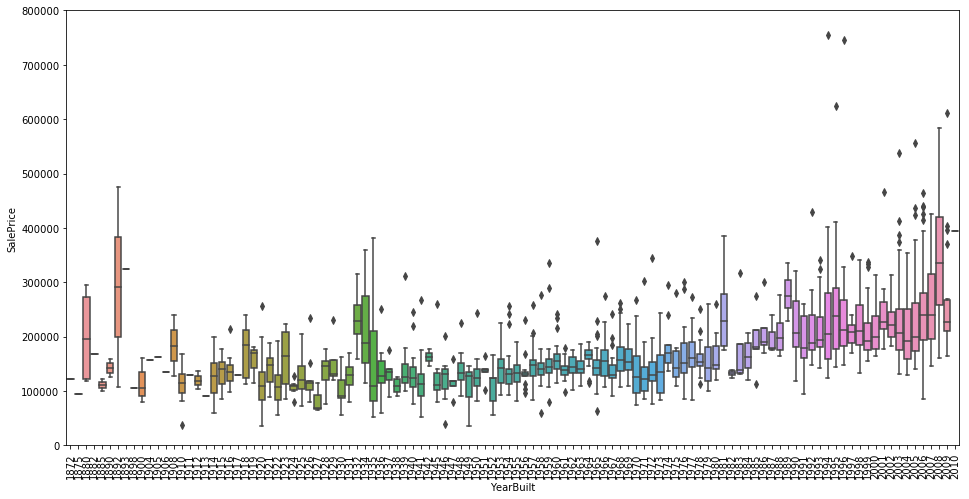

In [6]:
#2) box plot YearBuilt/saleprice
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


Observamos que:
- Valores 0 no parece indicar que el dato esté mal, sino indicar que esa casa no tenia esa variable ( el de area de garaje 0 es que no tiene, el de sotano 0 es que no tiene, etc)
- Parece haber una relación lineal con grlivarea
- menos lineal con totalbsmtsf... lineal hasta cierto punto y luego parece exponencial.
- Esto lo confirmaremos cuando veamos hasta ue punto las vbles son independientes, pero parece que la distribución del precio con el área de la primera planta y el de la casa en general, se comportan igual
- respecto a YearBuilt, parece que un poco más sí cuestan las casas más nuevas... pero no del todo. Aquí sería interesante saber hasta que punto el efecto de la inflación se ha tenido en cuenta y cuan comparables son los precios a lo largo de los años, en cualqueir caso, para eso tenemos el año de venta y se analizará en el multivariante


***Variables Categóricas***

Veamos primero cuales son y pasemos luego a analizarlas

In [7]:
print(df_train.select_dtypes(include=['object']).columns.values)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


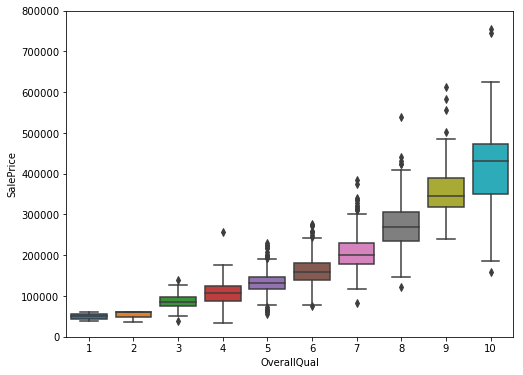

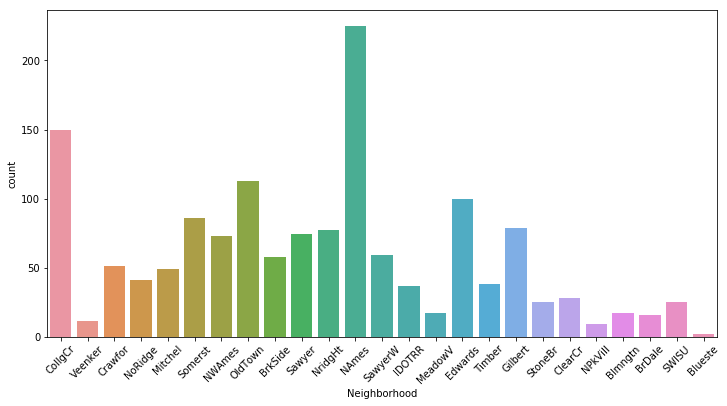

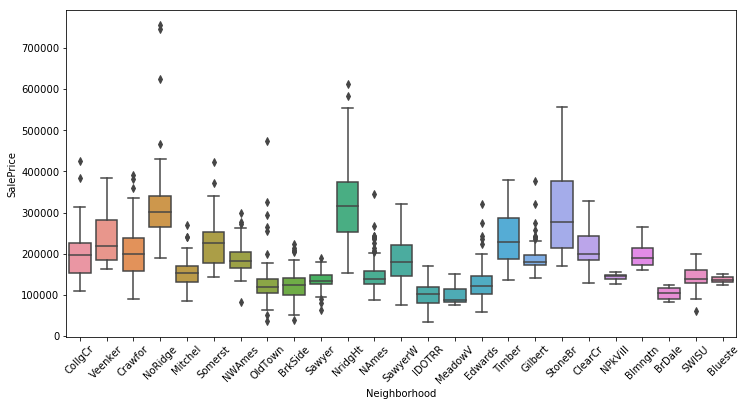

In [10]:
#1) box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


#3) Vecindario 
var= 'Neighborhood'
plt.figure(figsize = (12, 6))
sns.countplot(x =var, data = df_train)
xt = plt.xticks(rotation=45) ;

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df_train)
xt = plt.xticks(rotation=45)




De nuevo sí, hay relación entre OverallQual, la calidad de la casa y el precio, por un lado, además, el vecindario si parece influir bastante en el precio.



## 3. Análisis multivariante
Las variables anteriores se han seleccionado por lógica, pero no podemos estar seguros de que son todas correctas, lo óptimo es establecer una matriz de correlación a ver que variables resultan significativas, cuales no y su nivel de relación con la target

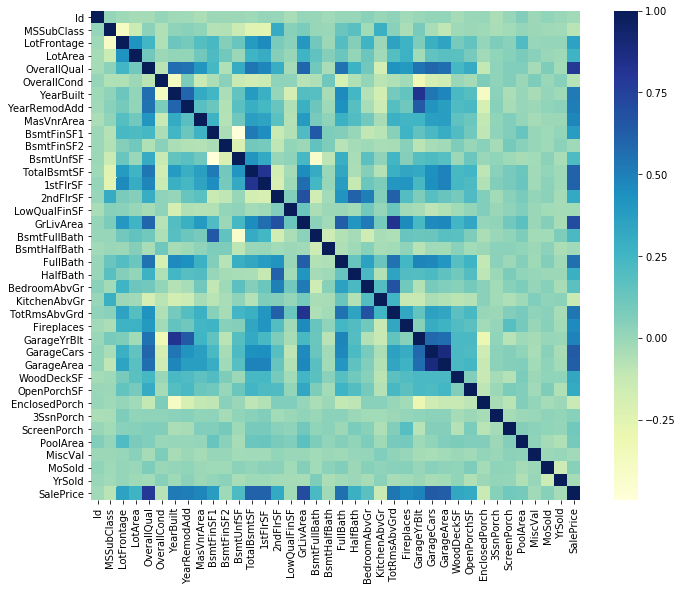

In [11]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, cmap="YlGnBu" , square=True)

Llama la atención los dos cuadrados más claritos, los que relacionan 'TotalBsmtSF' y '1stFlrSF' y todos los de 'Garage...' , y claro, tiene sentido, seguramente es que están correlacionadas (y no debemos usarlas a la vez, pues proporcionarán luego "ruido" al modelo).


Por otro lado, analizando la línea de la target, SalesPrice, vemos que en efecto, las variables antes seleccionadas por lógica 'GrLivArea', 'TotalBsmtSF' y 'OverallQual', están bien correlacionadas con la target.
Contabilicemos cuanto

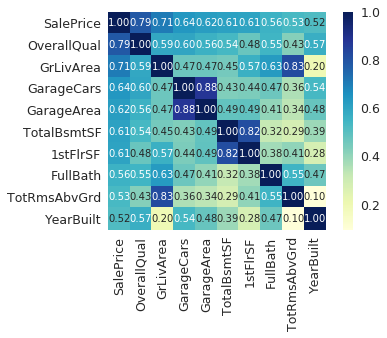

In [12]:
#saleprice matrix de correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, cmap="YlGnBu" , annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [13]:
cor_dict = corrmat['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("Correlación descendiente TodasVbles vs Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

Correlación descendiente TodasVbles vs Sale Price:

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
KitchenAbvGr: 	-0.1359073708421417
EnclosedPorch: 	-0.12857795792595636
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MSSubClass: 	-0.08428413512659523
OverallCond: 	-0.0778558940486776
MoS

Seleccionaremos estas variables
- 'OverallQual'
- 'GrLivArea'
- 'GarageCars' y 'GarageArea' también, pero como están correlacionadas entre ellas, elegimos solo 'GarageCars' (la de correlación mayor).
- 'TotalBsmtSF' y '1stFloor' Lo mismo. Seleccionamos 'TotalBsmtSF'
- 'FullBath'
- 'TotRmsAbvGrd' y 'GrLivArea' Lo mismo. Seleccionamos 'GrLivArea'
- 'YearBuilt' también, aunque hemos visto antes que podía ser rara

Vamos a ver su distribución

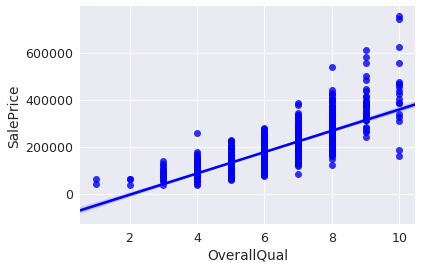

In [14]:
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = df_train, color = 'blue')

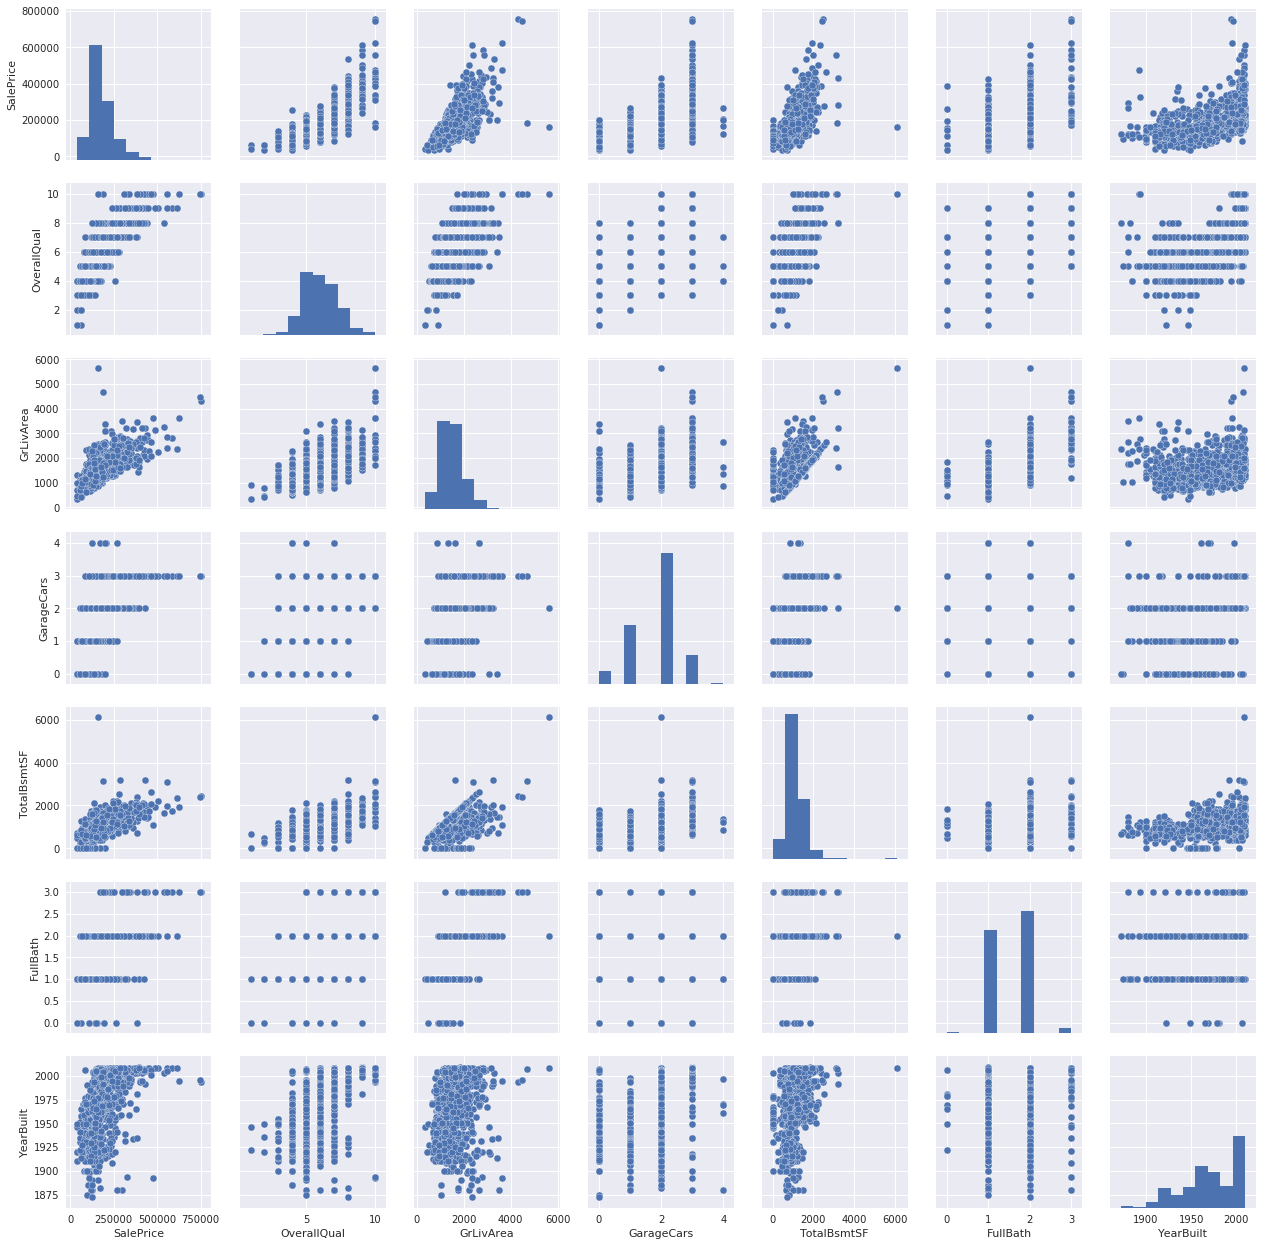

In [15]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Vemos que 'TotalBsmtSF' y 'GrLiveArea' dibujan prácticamente una linea y el resto de puntos van por debajo... claro, puedes tener garajes que ocupen toda la propiedad pero no al revés (sería absurdo)
Con 'SalePrice' y 'YearBuilt' pasa lo que adelantábamos antes, a partir de cierto año los precios crecen mucho, en cualqier caso, sigue siendo una variable a tener en cuenta. 